### 2022-1 Artificial Intelligence (01)
## Homework #1: MLP from the scratch
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

Ewha Womans University

In [1]:
import numpy as np

In [2]:
# Sigmoid function
def sigmoid(x):
  # Problem 1.(a): fill here
  return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def dsigmoid(x):
  # Problem 1.(a): fill here
  return sigmoid(x) * (1 - sigmoid(x))

# Hyperbolic tangent function
def tanh(x):
  # Problem 1.(a): fill here
  return np.tanh(x)

# Derivative of hyperbolic tangent function
def dtanh(x):
  # Problem 1.(a): fill here
  return 1 - np.tanh(x) ** 2

In [3]:
# Mean squared error function
def MSE(O, T):
  # Problem 1.(b): fill here
  return np.square(np.subtract(O, T)).mean()

# Derivative of Mean squared error function
def dMSE(O, T):
  # Problem 1.(b): fill here
  return np.subtract(O, T)

In [4]:
class MLP:

  def __init__(self, learning_rate=0.001, n_epochs=5, n_inputs=2, n_hiddens=2, n_outputs=1):
    np.random.seed(42)
    self.lr = learning_rate
    self.n_epochs = n_epochs
    
    self.n_inputs = n_inputs
    self.n_hiddens = n_hiddens
    self.n_outputs = n_outputs

    self.first_layer_activation_func = tanh
    self.first_layer_dactivation_func = dtanh
    self.second_layer_activation_func = sigmoid
    self.second_layer_dactivation_func = dsigmoid
    self.loss_func = MSE
    self.dloss_func = dMSE
    self.first_layer_weights = None
    self.first_layer_bias = None
    self.second_layer_weights = None
    self.second_layer_bias = None

  def _init_params(self):
    # Problem 1.(c): fill here
    self.first_layer_weights = np.random.rand(2,2)
    self.first_layer_bias = np.random.rand(2,1)
    self.second_layer_weights = np.random.rand(1,2)
    self.second_layer_bias = np.random.rand(1,1)

  def _forward(self, X, T):
    # Problem 1.(d): fill here
    Z1 = np.dot(self.first_layer_weights, X) + self.first_layer_bias
    A1 = self.first_layer_activation_func(Z1)
    Z2 = np.dot(self.second_layer_weights, A1) + self.second_layer_bias
    A2 = self.second_layer_activation_func(Z2)

    if T is None:
      A2 = A2.T
      return A2
    
    else:
      loss = self.loss_func(A2, T)
      return Z1, A1, Z2, A2, loss

  def _backward(self, X, Z1, A1, Z2, A2, T):
    # Problem 1.(e): fill here
    dW2 = np.dot((A2-T), A1.T)
    dB2 = np.sum(A2-T, axis=1, keepdims=True)
    dA1 = np.dot(self.second_layer_weights.T, A2-T)
    dZ1 = dA1 * A1 * (1-A1)
    dW1 = np.dot(X, dA1.T)
    dB1 = np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2

  def predict(self, X):
    return self._forward(X, None)

  def fit(self, X, T):
    
    self._init_params()
    loss_trace = []

    for _ in range(self.n_epochs):
      Z1, A1, Z2, A2, loss = self._forward(X, T)
      dW1, dB1, dW2, dB2 = self._backward(X, Z1, A1, Z2, A2, T)
      
      # Problem 1.(f): fill here
      self.first_layer_weights = self.first_layer_weights - self.lr * dW1
      self.first_layer_bias = self.first_layer_bias - self.lr * dB1
      self.second_layer_weights = self.second_layer_weights - self.lr * dW2
      self.second_layer_bias = self.second_layer_bias - self.lr * dB2

      loss_trace.append(loss)

    return loss_trace

In [5]:
# Problem 1.(g): fill here
mlp = MLP(learning_rate=0.01, n_epochs=100000)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
y = np.array([0, 1, 1, 0])
loss_trace = mlp.fit(X, y)

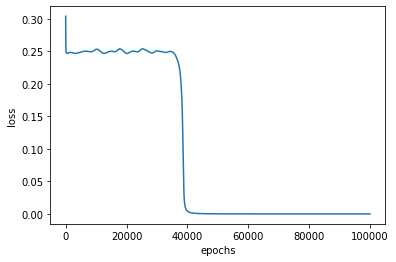

In [6]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [7]:
# Print out XOR outputs for an input matrix X
print(mlp.predict(X))

[[0.00154043]
 [0.99660862]
 [0.99792916]
 [0.00154043]]
